DSCI 8133 - Foundations of Data Science

# Descriptive Statistics
## Google CoLab Version

This notebook explores basic descriptive statistics by looking at a dataset that contains a sample of humans. These data are completely real. They were obtained from http://mreed.umtri.umich.edu/mreed/downloads.html#ansur2 and were acquired as part of the 1988 U.S. Army Anthropometry survey. They consist of data from men and women of the armed forces. For each person, the dataset records sex, height in cm, weight in kg, and BMI index. Note: the original dataset contained height in millimeters and weight in decagrams. An instructor from Mississippi State University, Jonathan Barlow, performed the units conversions and calculated the BMI.

In this notebook, you will learn how to use descriptive statistics and exploratory plots to understand a sample of data.

In [54]:
# Import two important data wrangling tools
import pandas as pd
import numpy as np
name = "Marion"
email = "mrnlowery@gmail.com"
# Import Plotting Tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')

# Let's load up our data
bmiDataset = pd.read_csv("https://dsci.msstate.edu/downloads/datasets/bmi.csv")


# Let's see the first 10 rows of a random sample of 100 rows
print (bmiDataset.sample(100).head(10))
print(name)
print(email)




         Sex  Height  Weight        BMI
2611  Female   157.3    62.3  25.178543
221     Male   176.2    92.0  29.633027
1587    Male   174.6    90.6  29.719378
2874  Female   164.0    73.8  27.439024
3948  Female   166.3    67.4  24.371115
1330    Male   177.4    82.3  26.151259
1191    Male   187.3    92.4  26.338826
423     Male   175.0    81.7  26.677551
434     Male   176.3    71.0  22.843031
967     Male   171.5    59.7  20.297665
Marion
mrnlowery@gmail.com


In [38]:
name = "Marion"
print(name)

email = "mrnlowery@gmail.com"
print(email)

Marion
mrnlowery@gmail.com


The data have this shape:

1. Index - like a row number - starts at 0 and increases through the number of observations.
2. Sex - Male or Female
3. Height - in centimeters
4. Weight - in kilograms
5. BMI (Weight in kg divided by the height in meters squared)

Generally, BMI is interpreted this way, though it is a fairly suspect measurement given human variation:

|BMI|Weight Classification|
| --- | ----------- |
|Below 18.5|Underweight|
|18.5-24.9|Normal|
|25.0-29.9|Overweight|
|30.0 or Higher|Obesity|


## Measures of Central Tendency

First, we'll want to do a simple test to see some basic measures of central tendency.

In [2]:
## Use the .describe() method to see a summary of the fields.

bmiDataset.describe()

,Height,Weight,BMI
count,3982.000000,3982.000000,3982.000000
mean,168.569990,69.353214,24.263995
std,9.044609,12.674489,2.995347
min,142.800000,41.300000,16.256218
25%,161.700000,60.000000,22.096052
50%,168.200000,67.600000,24.020930
75%,175.200000,77.600000,26.257285
max,204.200000,127.800000,38.795164


Notice that you get count of observations (3,982), the mean, standard deviation, the minimum, the maximum, and the quartiles for the dataset. The median is the 50% quartile.

What you'll notice is that for height and weight we now have some useful information.

Count tells us that there are 3,982 observations in the data, that is "3,982 rows."

The mean height is 168.6 centimeters.

The mean weight is 69.3 kilograms.

# Dot Plot

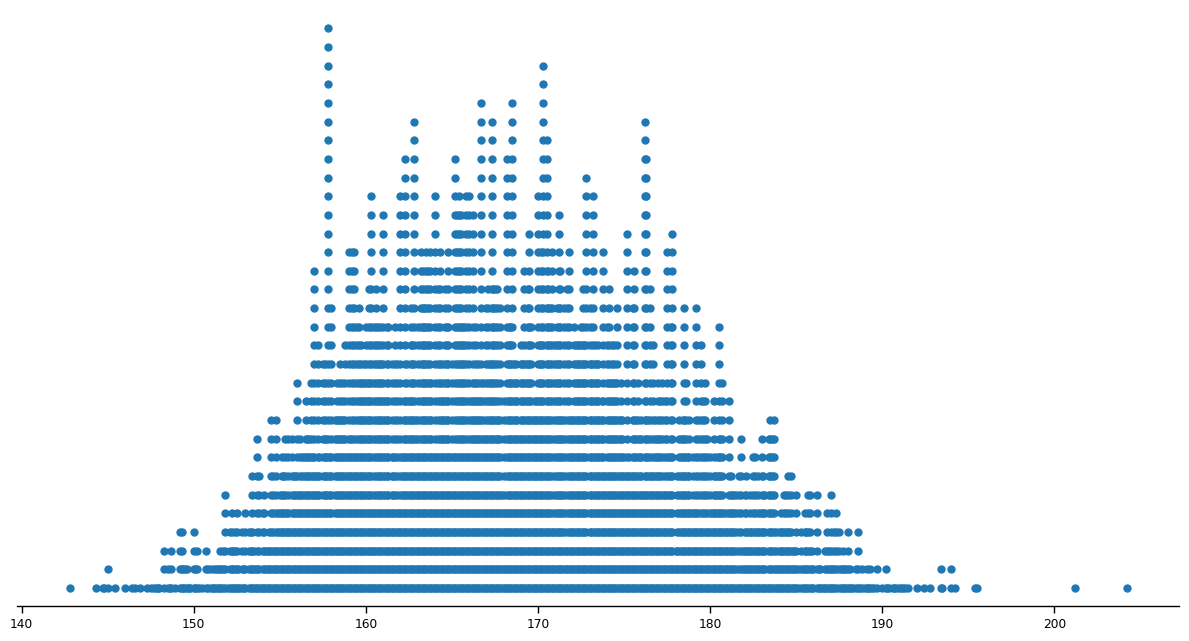

In [3]:
def dot_diagram(dataset):
    values, counts = np.unique(dataset, return_counts=True)
    data_range = max(values)-min(values)
    width = data_range/2 if data_range<30 else 15
    height = max(counts)/3 if data_range<50 else max(counts)/4
    marker_size = 10 if data_range<50 else np.ceil(30/(data_range//10))
    fig, ax = plt.subplots(figsize=(width, height))
    for value, count in zip(values, counts):
        ax.plot([value]*count, list(range(count)), marker='o', color='tab:blue',
                ms=marker_size, linestyle='')
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_ylim(-1, max(counts))

dot_diagram(bmiDataset['Height'])

# Nice Frequency Table

In [4]:
# make a quick copy of the bmiDataset
df = bmiDataset.copy()

# Define the bin edges (5-inch intervals)
bin_edges = np.arange(df['Height'].min() - 0.5, df['Height'].max() + 5.5, 5)

# Cut the height into 5-inch bins and calculate the frequency
df['Height_bins'] = pd.cut(df['Height'], bins=bin_edges)
frequency = df['Height_bins'].value_counts().sort_index()

# Calculate the midpoint for each bin
midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate relative frequency
relative_frequency = frequency / frequency.sum()

# Define the intervals for each bin
intervals = [f"{int(bin_edges[i]+0.5)}-{int(bin_edges[i+1]-0.5)}" for i in range(len(bin_edges)-1)]

# Create the frequency table
freq_table = pd.DataFrame({
    'Interval': intervals,
    'Midpoint': midpoints,
    'Frequency': frequency.values,
    'Relative Frequency': relative_frequency.values
})

# Add the total row
total_row = pd.DataFrame({
    'Interval': ['Total'],
    'Midpoint': [''],
    'Frequency': [frequency.sum()],
    'Relative Frequency': [relative_frequency.sum()]
})

# Append the total row to the frequency table
freq_table = pd.concat([freq_table, total_row], ignore_index=True)

freq_table

,Interval,Midpoint,Frequency,Relative Frequency
0,142-146,144.8,12,0.003014
1,147-151,149.8,83,0.020844
2,152-156,154.8,326,0.081868
3,157-161,159.8,664,0.166750
4,162-166,164.8,785,0.197137
5,167-171,169.8,742,0.186339
6,172-176,174.8,646,0.162230
7,177-181,179.8,426,0.106981
8,182-186,184.8,232,0.058262
9,187-191,189.8,54,0.013561


# Nice Histogram from Frequency Table

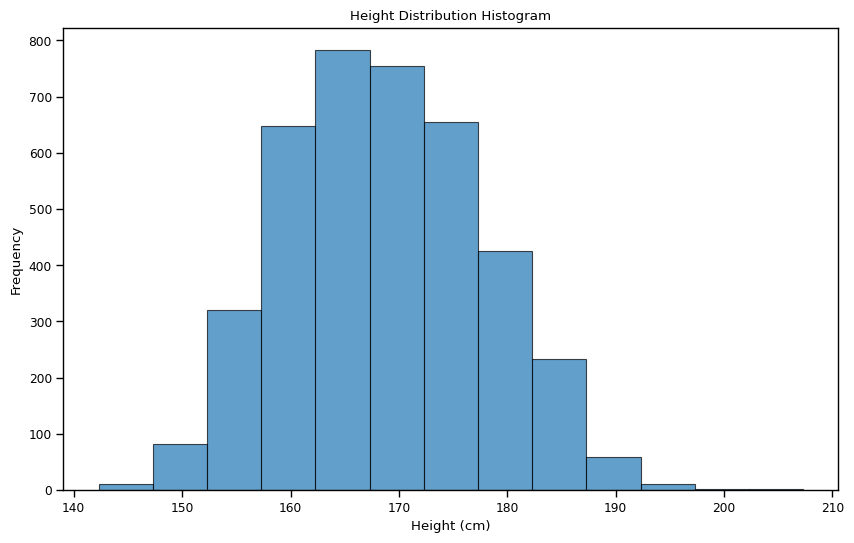

In [5]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Height'], bins=bin_edges, edgecolor='black', alpha=0.7)


# Adding titles and labels
plt.title('Height Distribution Histogram')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()




Now, let's calculate the mode, the most frequent value in the dataset.

In [6]:
# calculate mode of height and weight columns

print(bmiDataset[["Height","Weight"]].mode(axis=0))

   Height  Weight
0   157.8    61.0


## Visualization and Tests

Let's figure out the shape of our data visually by using plots / charts.

### Histogram

One of the first things we need to know is how the data in our sample are distributed. A histogram  represents the distribution of numerical data by putting observations into a number of bins along the x axis and graphing, on the y axis, the number of observations in that bin. Pandas makes it really easy to create histograms and we can specify the number of bins.

Here are the histograms for all numerical fields in the data.

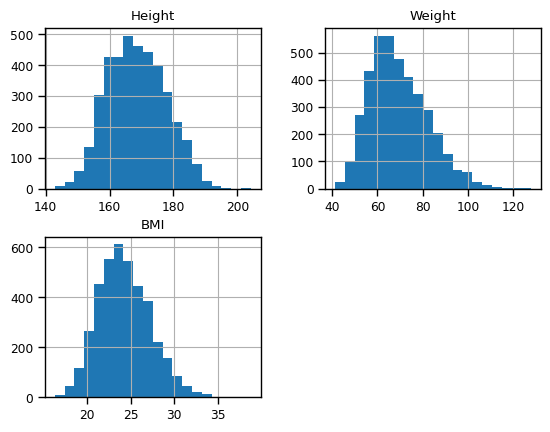

In [7]:
hist = bmiDataset.hist(bins=20)

Unsurprisingly, height and width show a familiar distribution. Perhaps this distribution will look evern more normal if we visualize the histogram only using data where the sex is male or female. Here's the distribution of male height and width.

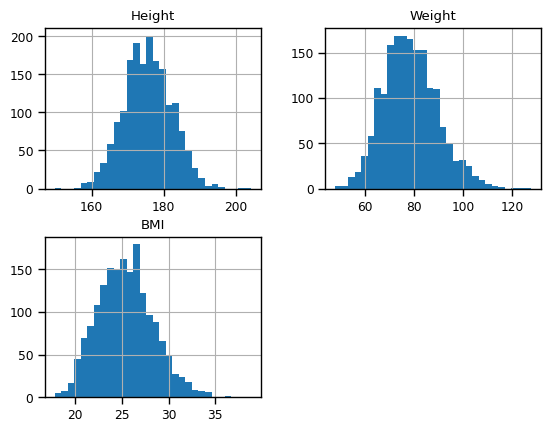

In [8]:
hist = bmiDataset.loc[bmiDataset['Sex'].str.contains('Male')].hist(bins=30)

And here are histograms showing the distribution of female height and width:

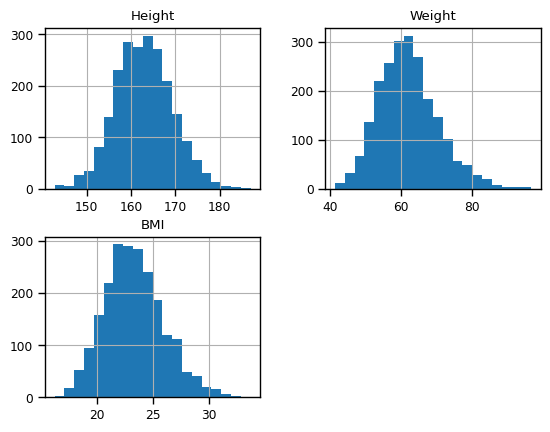

In [9]:
hist = bmiDataset.loc[bmiDataset['Sex'].str.contains('Female')].hist(bins=20)

For male and female members of the sample, graphed individually, we see fairly symmetrical distributions around the mean. We can also use Pandas describe() to compare male and female patterns.

Female first:

In [10]:
bmiDataset.loc[bmiDataset['Sex'].str.contains('Female')].describe()

,Height,Weight,BMI
count,2208.000000,2208.000000,2208.000000
mean,162.937228,62.014900,23.335722
std,6.360392,8.351159,2.648955
min,142.800000,41.300000,16.256218
25%,158.500000,56.100000,21.504174
50%,162.800000,61.300000,23.153421
75%,167.200000,67.000000,24.969395
max,187.000000,96.700000,33.677753


Now, Male:

In [11]:
bmiDataset.loc[bmiDataset['Sex'].str.contains('Male')].describe()

,Height,Weight,BMI
count,1774.000000,1774.000000,1774.000000
mean,175.580778,78.486809,25.419366
std,6.680724,11.106416,3.000360
min,149.700000,47.600000,17.805978
25%,171.000000,70.800000,23.269009
50%,175.550000,77.700000,25.297122
75%,180.100000,85.300000,27.271850
max,204.200000,127.800000,38.795164


Comparing the summary of male and female data, we see that the average male height is 175.58 centimenters (5'9") while the average female height is 162.94 centimeters (5'4"). This is consistent with our histrogram observations in which the center of the female height distribution is shifted to left.

### One Categorical Variable

Let's plot the categorical variable sex to see the proportion of males to females in the dataset.

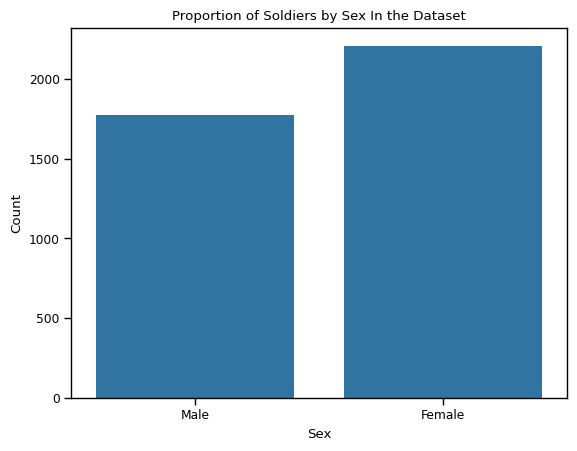

In [12]:
sns.countplot(x=bmiDataset['Sex'])

plt.title('Proportion of Soldiers by Sex In the Dataset')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

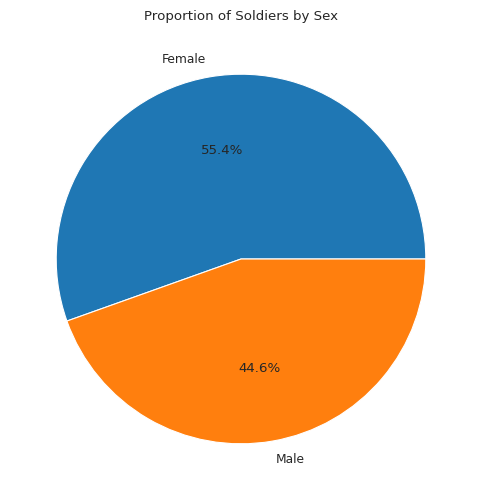

In [13]:
palette_color = sns.color_palette('bright')

# Calculate the counts of each category
counts = bmiDataset['Sex'].value_counts()

# Create a pie chart using matplotlib
sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Proportion of Soldiers by Sex')
plt.show()





Notice that we have more females than males in the sample.

In descriptive statistics, we're only interested in what we see in the sample. We could be sampling the students at an all-boys school and this would tell us nothing about the general population of humans as a whole. In this case, the measurements were made of persons in the armed forces.

Inferential statistics would continue on to see if the proportion of males to females in our sample conforms to expectations outside of the sample in the population of the branch of the military from which these measurements were made.

## Two Categorical Variables

Sometimes we want to visualize two categorical variables at the same time. For example, perhaps our dataset breaks humans in our dataset into Short, Average, and Tall.

The following code will do that breakdown for us pretty quickly with this standard in mind.

|Range|Label|
|-----|-----|
|< 5.3 feet|'short'|
|5.4 ft - 5.7 ft|'average'|
|5.8 to 6 ft >|'tall'|
|6.1 ft >|'extra tall'|

In [14]:
# note - 12 for inches in a foot, 2.54 for cm in an inch
bins=[0, 5.3*12*2.54, 5.4*12*2.54, 5.8*12*2.54, 6.1*12*2.54]
labels=['Short', 'Average', 'Tall', 'Extra Tall']
bmiDataset['Height_Group'] = pd.cut(bmiDataset['Height'], bins, labels=labels)
bmiDataset.head()

,Sex,Height,Weight,BMI,Height_Group
0,Male,173.5,88.3,29.333355,Tall
1,Male,183.0,86.5,25.829377,Extra Tall
2,Male,172.6,71.3,23.933596,Tall
3,Male,178.3,81.6,25.667731,Extra Tall
4,Male,166.9,75.6,27.139955,Tall


Great, now let's visualize the breakdown of height categories by male and female.

<Axes: title={'center': 'Height Category by Sex'}, xlabel='Sex', ylabel='count'>

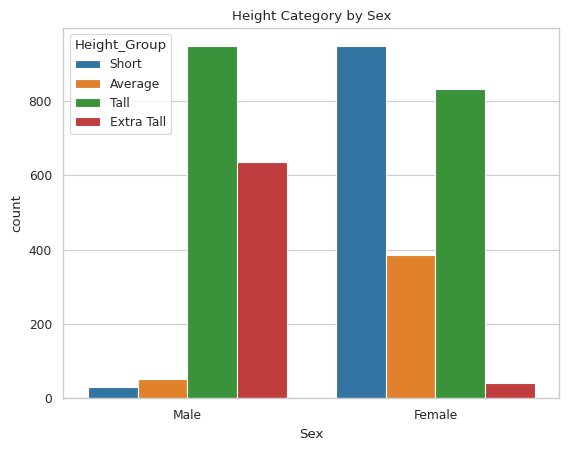

In [15]:
plt.title('Height Category by Sex')

sns.countplot(data=bmiDataset, x="Sex", hue="Height_Group")

Or, we can see the breakdown of male and female for each height category. That will probably be easier to understand.

<Axes: title={'center': 'Sex by Height Category'}, xlabel='Height_Group', ylabel='count'>

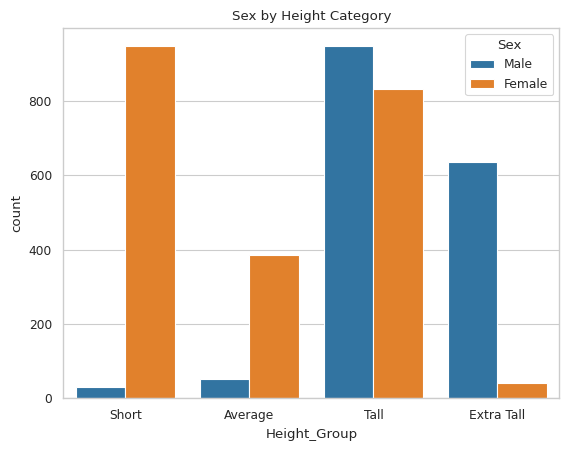

In [16]:
plt.title('Sex by Height Category')

sns.countplot(data=bmiDataset, x="Height_Group", hue="Sex")

Ah, very interesting. In our sample, the number of short males and extra tall females is barely appreciable with this scale.

## One Numeric Variable

Let's now turn to the numeric variables in our dataset and visualize them. We can start with height.

A common way to plot a variable so that we can see its distribution, mean, median, etc. is the box plot.

<Axes: title={'center': 'Height in Centimeters'}, xlabel='Height'>

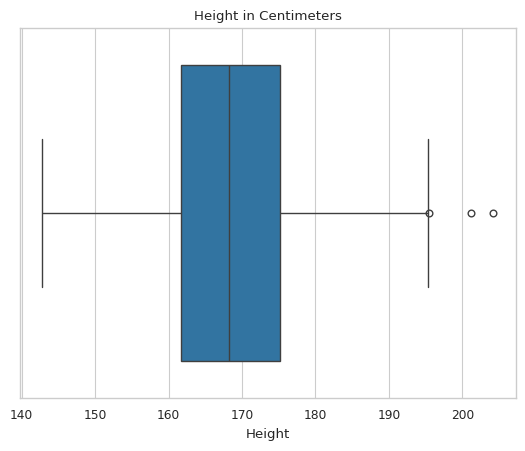

In [17]:
plt.title('Height in Centimeters')
sns.boxplot(data=bmiDataset, x="Height")

The way a boxplot works, we can easily see the min (around 142 cm), the max (around 204.2), the inter-quartile range, and the median (just less than 170). The max is actually an outlier.

## One Numeric, One Categorical Variable

Maybe we'd like to break down the box plot by Sex.

<Axes: title={'center': 'Height in Centimeters by Sex'}, xlabel='Height', ylabel='Sex'>

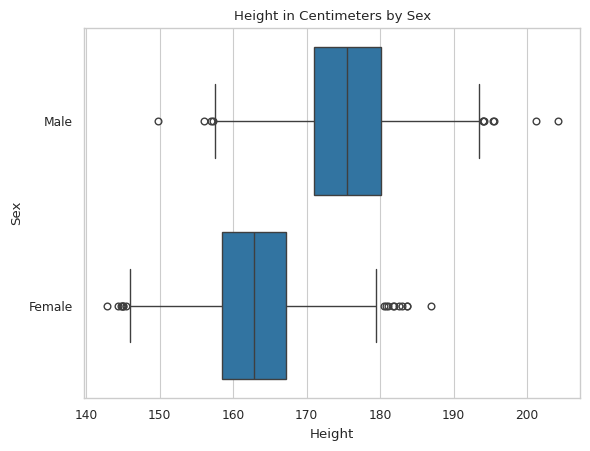

In [18]:
plt.title('Height in Centimeters by Sex')
sns.boxplot(data=bmiDataset, x="Height", y="Sex")

For fun, we could even break down height by our height bins just to see what they look like.

<Axes: title={'center': 'Height in Height Categories'}, xlabel='Height', ylabel='Height_Group'>

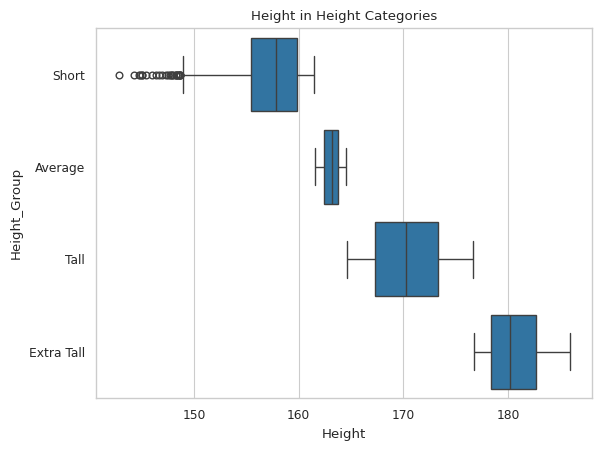

In [19]:
plt.title('Height in Height Categories')
sns.boxplot(data=bmiDataset, x="Height", y="Height_Group")

As we expected, the max of the "Short" category ends immediately before the min of the "Average," and so forth. But we can also easily see the shape of each category with the median and inter-quartile range of the tall being close to the middle between min and max and the median and interquartile range of the extra talls being close to the min for that group. We can also see outliers at the short and extra tall ends of the scale.

## Two Numeric Variables

Perhaps we'd like to examine how two numeric variables relate. With height and width we would expect that as people get taller there is more of them and thus their weight should increase with height. Does our sample look like this?

<Axes: title={'center': 'Height by Weight in Our Sample'}, xlabel='Weight', ylabel='Height'>

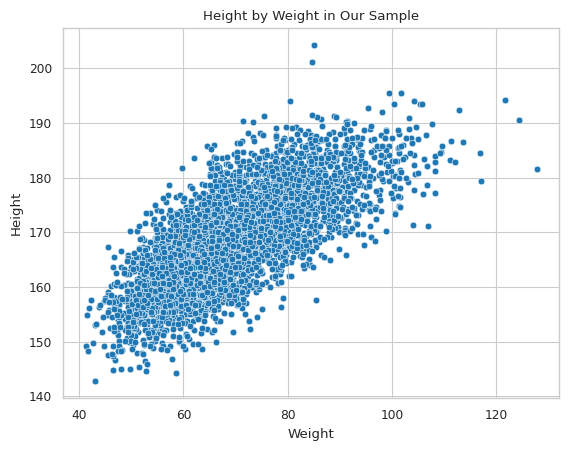

In [20]:
# first, let's order our dataset by

plt.title('Height by Weight in Our Sample')
sns.scatterplot(data=bmiDataset, x='Weight', y='Height')

Yes, this looks exactly as we suspected with a pretty strong correlation between weight and height. We could, in fact, visualize this with a line plot in which the correlation will be even clearer.

<Axes: title={'center': 'Height by Weight in Our Sample'}, xlabel='Weight', ylabel='Height'>

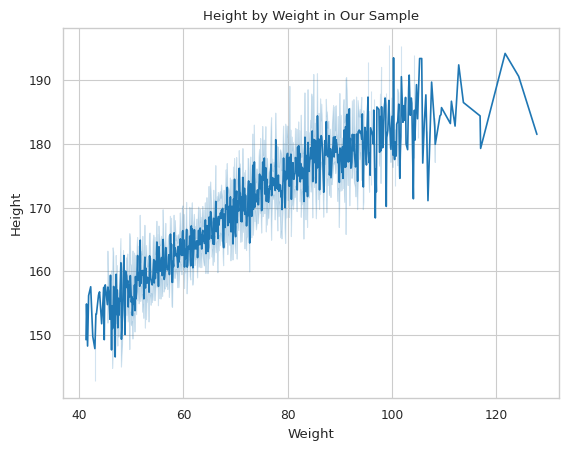

In [21]:
plt.title('Height by Weight in Our Sample')
sns.lineplot(data=bmiDataset, x='Weight', y='Height')

Yes, the graph almost looks like a line - a linear relationship. As weight increases, the height increases at what looks like a calculable slope.

## Frequency Tables

Another useful technique for descriptive statistics is to create frequency tables. We might wish to answer the question of how frequently each of the height categories shows up in our sample. These are sometimes called "crosstabs."

In [22]:
pd.crosstab(index=bmiDataset['Height_Group'], columns='count')

col_0,count
Height_Group,
Short,979
Average,438
Tall,1781
Extra Tall,676


We can see that there are 979 observations of people in the Short category, 1,781 in the Tall category, and 676 in the Extra Tall Category.  Perhaps we'd rather have percentage:

In [23]:
tab = pd.crosstab(index=bmiDataset['Height_Group'], columns='count')
tab/tab.sum()

col_0,count
Height_Group,
Short,0.252710
Average,0.113061
Tall,0.459732
Extra Tall,0.174497


We can see that 25% of people in the sample are in the Short category.

We can also do a two-way frequency table. Maybe we want to see the breakdown of height categories by male and female.

In [24]:
pd.crosstab(index=bmiDataset['Height_Group'], columns=bmiDataset['Sex'])

Sex,Female,Male
Height_Group,,
Short,949,30
Average,386,52
Tall,833,948
Extra Tall,39,637


This helps to see the true number of short males (30) and extra tall females (39). That's why we could barely see them in the bar graphs above.

And we can do the same trick to get percentages.

In [25]:
tab = pd.crosstab(index=bmiDataset['Height_Group'], columns=bmiDataset['Sex'])
tab/tab.sum()

Sex,Female,Male
Height_Group,,
Short,0.429995,0.017996
Average,0.174898,0.031194
Tall,0.377435,0.568686
Extra Tall,0.017671,0.382124


## Stacked Bar Chart

Another great technique to see a breakdown of two categorical variables is to use a stacked bar chart.

Here we see height group by male and female. You can see that each bar "stacks" the height categories. We start by making a crosstab just as we did above.

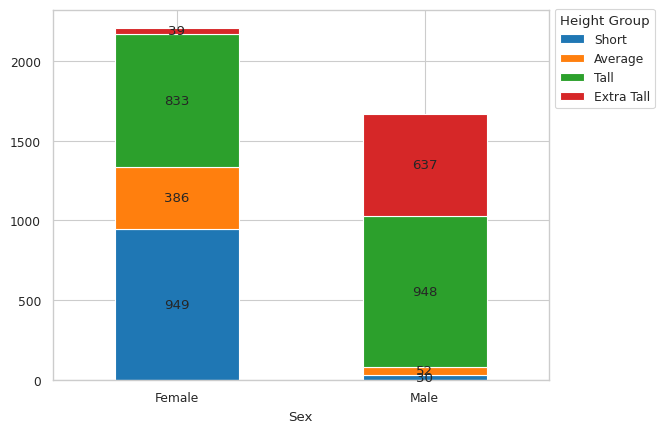

In [26]:
crosstab = pd.crosstab(index=bmiDataset['Sex'], columns=bmiDataset['Height_Group'])

ax = crosstab.plot(kind='bar', stacked=True, rot=0)
ax.legend(title='Height Group', bbox_to_anchor=(1, 1.02), loc='upper left')

# add annotations
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, label_type='center')


Unfortunately, at this scale, we can barely see the extra tall female and short male categories.

## Two Numeric Variables, 1 Category

How about weight and height by sex? We'll put weight on the X axis and height on the Y and use a line plot to see each sex in a different color.

<Axes: title={'center': 'Height to Weight By Sex'}, xlabel='Weight', ylabel='Height'>

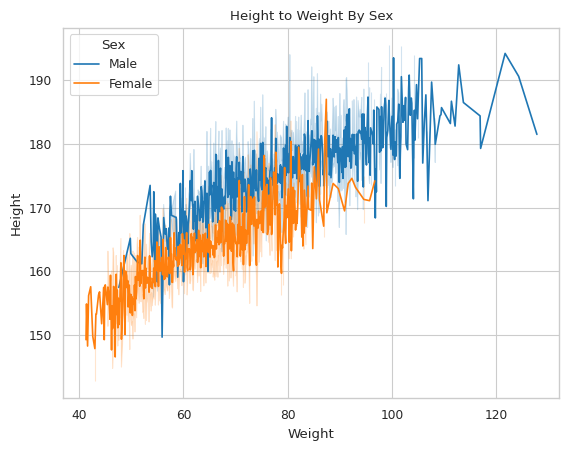

In [27]:
plt.title('Height to Weight By Sex')
sns.lineplot(x="Weight", y="Height", hue="Sex", data=bmiDataset)

Here we can see that both men and women have a strong correlation between weight and height and that men tend be taller, on average, than women in the sample.

## Testing Correlation Numerically

To test and see whether there is a correlation numerically, you can use a simple test like the Pearson Correlation Coefficient to get a correlation matrix. Numpy makes this very easy and you can just pass in two series from your dataframe. Pearson's is appropriate for detecting a linear correlation like we think we're seeing in the graph above.

In [28]:
np.corrcoef(bmiDataset['Height'],bmiDataset['Weight'])

array([[1.        , 0.74210289],
       [0.74210289, 1.        ]])

You can see that the correlation is .74. Pearson's Correlation Coefficient is always between -1 and 1, from negative correlation to positive correlation. .74 is above .5. A corelation coefficient of .5 is generally the threshold where a positive correlation begins, so the numbers confirm what we're seeing with our eyes; a strong positive correlation between height and weight. Now, that correlation is not rocket science. Of course a human who is taller will tend to have more mass and thus more weight on earth. But sometimes it's not so obvious or we want to test numerically so that a machine can act on the strength of the correlation without having the benefit of human intuition when looking at a graph.